# TRATADOS DE PAZ 

### Rubén Gómez Márquez


## LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

%matplotlib inline

## CARGA Y MODIFICACIÓN INICIAL DEL DATASET

El primer paso es cargar todos los dataset de las diferentes regiones y unirlos todos en un único dataset.

In [2]:
#CARGAMOS TODOS LOS DATASET UTILIZANDO PANDAS
africa=pd.read_csv('africa.csv')
print("Nº tratados relacionados con Africa: %d" %len(africa))
americas=pd.read_csv('americas.csv')
print("Nº tratados relacionados con Americas: %d" %len(americas))
asia=pd.read_csv('asia.csv')
print("Nº tratados relacionados con Asia: %d" %len(asia))
cross=pd.read_csv('cross.csv')
print("Nº tratados entre regiones: %d" %len(cross))
europa=pd.read_csv('europa.csv')
print("Nº tratados relacionados con Europa: %d" %len(europa))
nortafrica=pd.read_csv('nortafrica.csv')
print("Nº tratados relacionados con norte de Africa: %d" %len(nortafrica))

#CON LA FUNCION CONCAT DE PANDAS PODEMOS JUNTAR TODOS LOS DATASET EN UNO SOLO
mundo=pd.concat([africa,americas,asia,cross,europa,nortafrica], axis=0)
print("Nº tratados totales: %d" %len(mundo))

#SE MUESTRA UN EJEMPLO DEL DATASET
mundo.sample(5)

Nº tratados relacionados con Africa: 584
Nº tratados relacionados con Americas: 195
Nº tratados relacionados con Asia: 377
Nº tratados entre regiones: 38
Nº tratados relacionados con Europa: 411
Nº tratados relacionados con norte de Africa: 263
Nº tratados totales: 1868


,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,N_characters,Agtp,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,Loc1GWNO,Loc2GWNO,UcdpCon,UcdpAgr,PamAgr,CowWar,GCh,GChRhet,GChAntid,GChSubs,GChOth,GDis,GDisRhet,GDisAntid,GDisSubs,GDisOth,GAge,GAgeRhet,GAgeAntid,GAgeSubs,GAgeOth,GMig,GMigRhet,GMigAntid,GMigSubs,GMigOth,GRa,GRaRhet,GRaAntid,GRaSubs,GRaOth,GRe,GReRhet,GReAntid,GReSubs,GReOth,GInd,GIndRhet,GIndAntid,GIndSubs,GIndOth,GOth,GOthRhet,GOthAntid,GOthSubs,GOthOth,GRef,GRefRhet,GRefSubs,GRefOth,GSoc,GSocRhet,GSocAntid,GSocSubs,GSocOth,GeWom,GeMe,GeMeNu,GeMeOth,GeLgbti,GeLgbtiPos,GeLgbtiNeg,GeFa,StDef,StGen,StCon,StSd,StRef,StSym,StInd,StUni,StBor,StXbor,Pol,PolGen,PolNewInd,PolNewTemp,ConRen,Cons,Ele,ElecComm,PolPar,PolParTrans,PolParOth,Civso,Tral,Pubad,Polps,PpsSt,PpsSub,PpsEx,PpsOro,PpsOthPr,PpsVet,PpsAut,PpsInt,PpsOth,Terps,TpsSub,TpsLoc,TpsAut,TpsOth,Eps,EpsRes,EpsFis,EpsOth,Mps,MpsMe,MpsJt,MpsPro,MpsOth,HrGen,EqGen,HrDem,Prot,ProtCiv,ProtGrp,ProtLgl,ProtOth,HrFra,HrfSp,HrfBor,HrfTinc,HrfOth,HrCp,CprLife,CprTort,CprEq,CprSlav,CprLib,CprDet,CprFmov,CprFspe,CprFass,CprTria,CprPriv,CprVote,CprReli,CprOth,HrSec,SerProp,SerWork,SerHeal,SerEdu,SerStdl,SerShel,SerSs,SerCult,SerOth,HrNi,HrNiMe,HrNiNe,HrNiOth,HrIi,HrIiMon,HrIiBod,HrIiOth,HrMob,HrDet,Med,MedGov,MedSubs,MedLog,MedOth,HrCit,CitGen,CitRights,CitDef,CitOth,JusCr,JusCrSp,JusCrSys,JusCrPow,JusEm,JusJu,JusPri,JusTra,Dev,DevSoc,DevHum,DevInfra,NEC,NatRes,IntFu,Bus,Tax,TaxPo,TaxRef,TaxOth,Ban,CenBan,BanPers,BanInt,BanXb,LaRef,LaRefMan,LaRefRet,LaRefOth,LaNom,LaCH,LaCHTa,LaCHIt,LaCHPro,LaCHOth,LaEn,Wat,SsrGua,Ce,CeProv,CeGen,SsrPol,SsrArm,SsrDdr,DdrDemil,DdrProg,SsrInt,SsrPsf,SsrFf,Cor,SsrCrOcr,SsrDrugs,Terr,TjGen,TjAm,TjAmPro,TjSan,TjPower,TjAmBan,TjCou,TjJaNc,TjJaIc,TjMech,TjPrire,TjVet,TjVic,TjMis,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
12,China/Mongolia/Russia,Territory,19,Russia-China-Central Asian borders interstate ...,Cross-regional,1809,1,Agreement between the Government of the Russia...,1994-01-27,Multiparty signed/agreed,2,4815,Inter,SubPar,Iss,Governments of Russian Federation; People's Re...,NaN,Agreement on the Eastern Section of the Bounda...,NaN,NaN,NaN,NaN,305,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106,Colombia,Government,97,Colombia I - Gaviria,Americas,163,1,Political Constitution of Colombia,1991-07-01,Multiparty signed/agreed,128,347199,Intra,SubComp,FrCons,National Constituent Assembly (Political Parti...,NaN,NaN,COL,NaN,100.0,NaN,289,NaN,NaN,856.0,3,0,0,1,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,3,0,1,1,0,3,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,1,1,3,0,1,1,0,3,3,3,1,0,1,1,1,3,2,1,0,0,1,1,0,0,0,0,3,0,1,1,1,3,1,0,0,0,0,0,0,0,1,1,3,3,0,1,1,1,3,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,3,0,1,0,0,0,0,0,0,1,3,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,3,0,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,0,0,0,2,3,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,1,1,3,0,0,3,0,1,0,1,1,0,0,0,0,0,1
386,Somalia,Government,87,Somalia Peace Process,Africa (excl MENA),317,1,Cairo Declaration on Somalia,1997-12-22,Multiparty signed/agreed,9,16571,Intra,SubPar,MultIss,"Hussein Mohamed Aideed, Mohamed Haji Adan, Hil...","Egypt, Yemen, IGAD (Kenya, Ethiopia, Djibouti,...","Proposed agreements: Page 4, (b) A Declaration...",SOM,NaN,520.0,NaN,337,1060.0,NaN,870.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2,0,0,1,0,2,1,0,0,0,0,0,0,0,3,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0

El siguiente paso consiste en pasar los datos aglomerados a un archivo .xlsx para poder analizarlo con la aplicación databasic.io.

In [3]:
#ESCRIBIMOS EL DATASET EN FORMATO EXCEL
mundo.to_excel('mundocompleto.xlsx', sheet_name='mundocompleto', header=True, index=False)

## TRANSFORMANDO VARIABLES DUMMY

In [4]:
#SELECCIONAMOS LAS COLUMNAS QUE VAMOS A ANALIZAR
data=mundo[['Contp','Agtp','Loc1ISO','Loc2ISO','GMig','GRa','GRe','GInd', 'GRef']]

#MODIFICAMOS LOS NOMBRES DE LAS COLUMNAS
data.columns=['Conflicto', 'Acuerdo', 'Pais1', 'Pais2', 'Inmigracion', 'Racial', 'Religioso', 'Indigenas', 'Refugiados']
data.sample(5)

,Conflicto,Acuerdo,Pais1,Pais2,Inmigracion,Racial,Religioso,Indigenas,Refugiados
227,Government/territory,IntraLocal,YEM,NaN,0,0,0,0,0
37,Government,Intra,COL,NaN,0,0,0,0,0
26,Government/territory,Intra,AZE,ARM,0,0,0,0,0
278,Government/territory,Intra,GEO,RUS,0,0,0,0,1
181,Government,InterIntra,SYR,NaN,0,0,0,0,0


Podemos ver que estas variables tienen una variable que unifica el resto de variables dummy. Todas ellas toman valores entre 0 y 3 dependiendo del estado de la variable y valor nos aporta un significado concreto. El siguiente paso será transformar estas variables numéricas en categóricas para facilitar la comprensión de las mismas (https://www.peaceagreements.org/files/PA_X_codebook_Version2_June_2019.pdf).

In [5]:
#GENERAMOS DOS VECTORES QUE RECORRAN LAS VARIABLES Y LOS VALORES DE LAS VARIABLES
mencion=['SinMencion','Retorico','Anti-discriminacion','Sustantivo']
columna=['Inmigracion', 'Racial', 'Religioso', 'Indigenas', 'Refugiados']

#UTILIZANDO UN BUCLE ANINADO TRANSFORMAMOS TODOS LOS VALORES NUMERICOS EN STRING
for i in columna:
    for j in range(4):
        data.loc[data[i]== j, i]=mencion[j]

C:\Users\rgome\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rgome\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\rgome\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
#MOSTRAMOS UN EJEMPLO DE MEXICO
data.loc[data['Pais1']=='MEX']

,Conflicto,Acuerdo,Pais1,Pais2,Inmigracion,Racial,Religioso,Indigenas,Refugiados
182,Government/territory,Intra,MEX,NaN,SinMencion,SinMencion,SinMencion,Sustantivo,Anti-discriminacion
183,Government/territory,Intra,MEX,NaN,Anti-discriminacion,SinMencion,SinMencion,Sustantivo,SinMencion
184,Government/territory,Intra,MEX,NaN,Anti-discriminacion,SinMencion,SinMencion,Sustantivo,SinMencion
185,Government/territory,Intra,MEX,NaN,SinMencion,SinMencion,SinMencion,Sustantivo,Anti-discriminacion
186,Government/territory,Intra,MEX,NaN,Retorico,SinMencion,SinMencion,Sustantivo,Retorico
187,Government/territory,Intra,MEX,NaN,SinMencion,SinMencion,SinMencion,Sustantivo,SinMencion


In [7]:
#ESCRIBIMOS EL DATASET EN FORMATO EXCEL
data.to_excel('mundolimpio.xlsx', sheet_name='mundolimpio', header=True, index=False)

## ANÁLISIS DE LOS DATOS

Veremos que utilizando un análisis de frecuencia que paises son los que más frecuentemente entran en conflicto y en que tipo de conflicto. **En nuestro caso los datos son de carácter cualitativo.**

#### CLASE DE CONFLICTOS

Text(0.5, 1.0, 'Tipo de acuerdo')

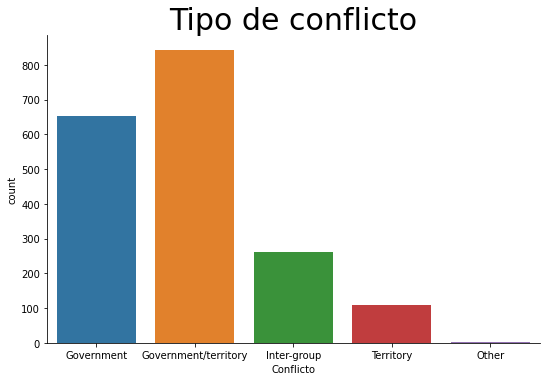

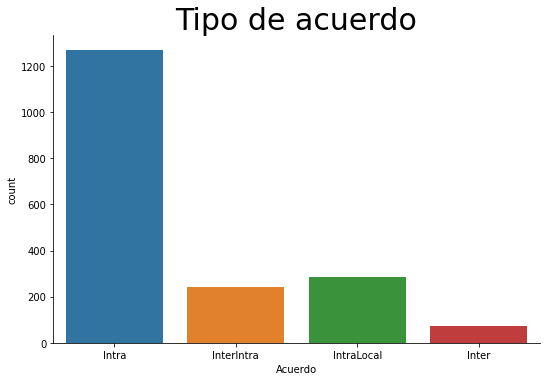

In [11]:
sns.catplot('Conflicto', data=data, kind='count', aspect=1.5)
plt.title('Tipo de conflicto', {'fontsize': 30})
sns.catplot('Acuerdo', data=data, kind='count', aspect= 1.5)
plt.title('Tipo de acuerdo', {'fontsize': 30})

Para ponernos en situación hare una breve explicación de los tipos de conflictos que representan estas variables:

-**Territory**: disputas puramente por el territorio.

-**Government**: disputas ideológicas o políticas.

-**Government/territory**: disputas territoriales intraestatales.

-**Other**: otro tipo de disputas.

-**Inter**: disputas entre paises o estados.

-**InterIntra**: hace referencia a disputas entre paises o estados pero que también incluyen conflictos intraestatales, concretamente los fronterizos, de forma que así se diferencian los conflictos fronterizos de los puramente intra o inter estatales.

-**Intra**: hace referencia a las disputas dentro del mismo estado.

-**IntraLocal**: caso particular de los conflictos "Intra" que se enfoca más a nivel local.


Visto esto lo que podemos observar es que **apenas se disputan conflictos territoriales ni inter estatales.

A su vez, **los conflictos de carácter ideológico, político o territorial son los que en mayor medida se producen junto con los conflictos a nivel estatal (Intra).**

Observando estos resultados es interesante plantearse entre que países se disputan más conflictos por asuntos territoriales.

#### PAISES INVOLUCRADOS

Text(0.5, 1.0, 'Pais involucrado')

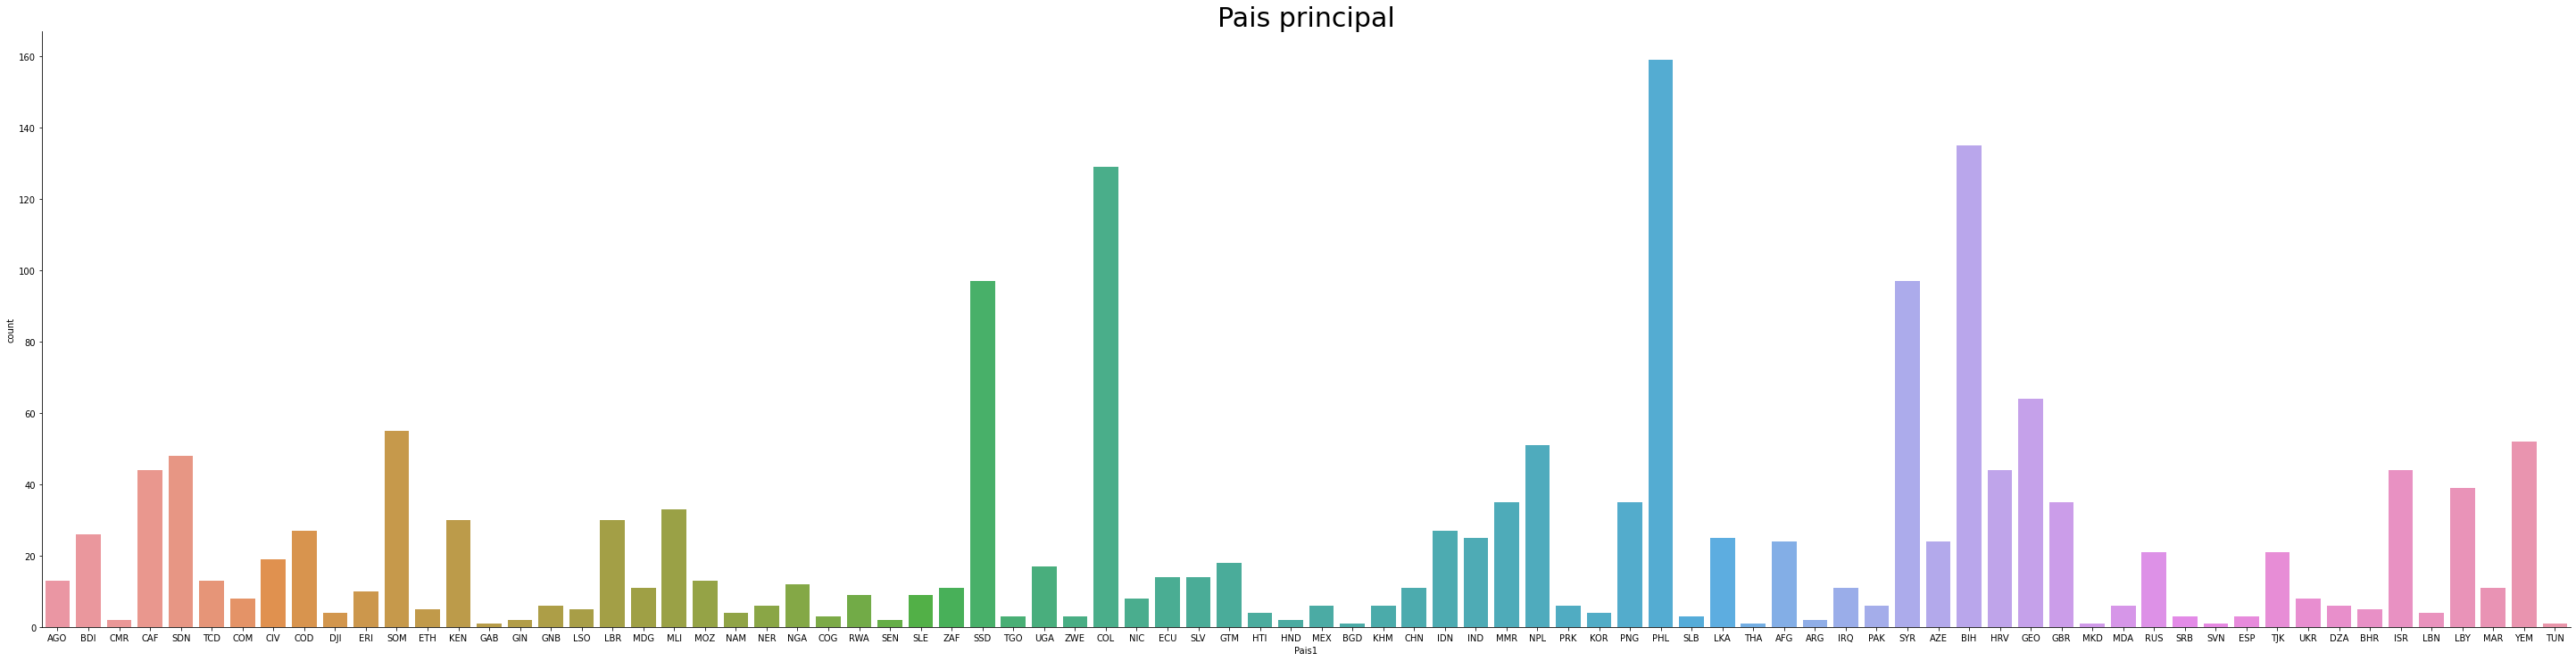

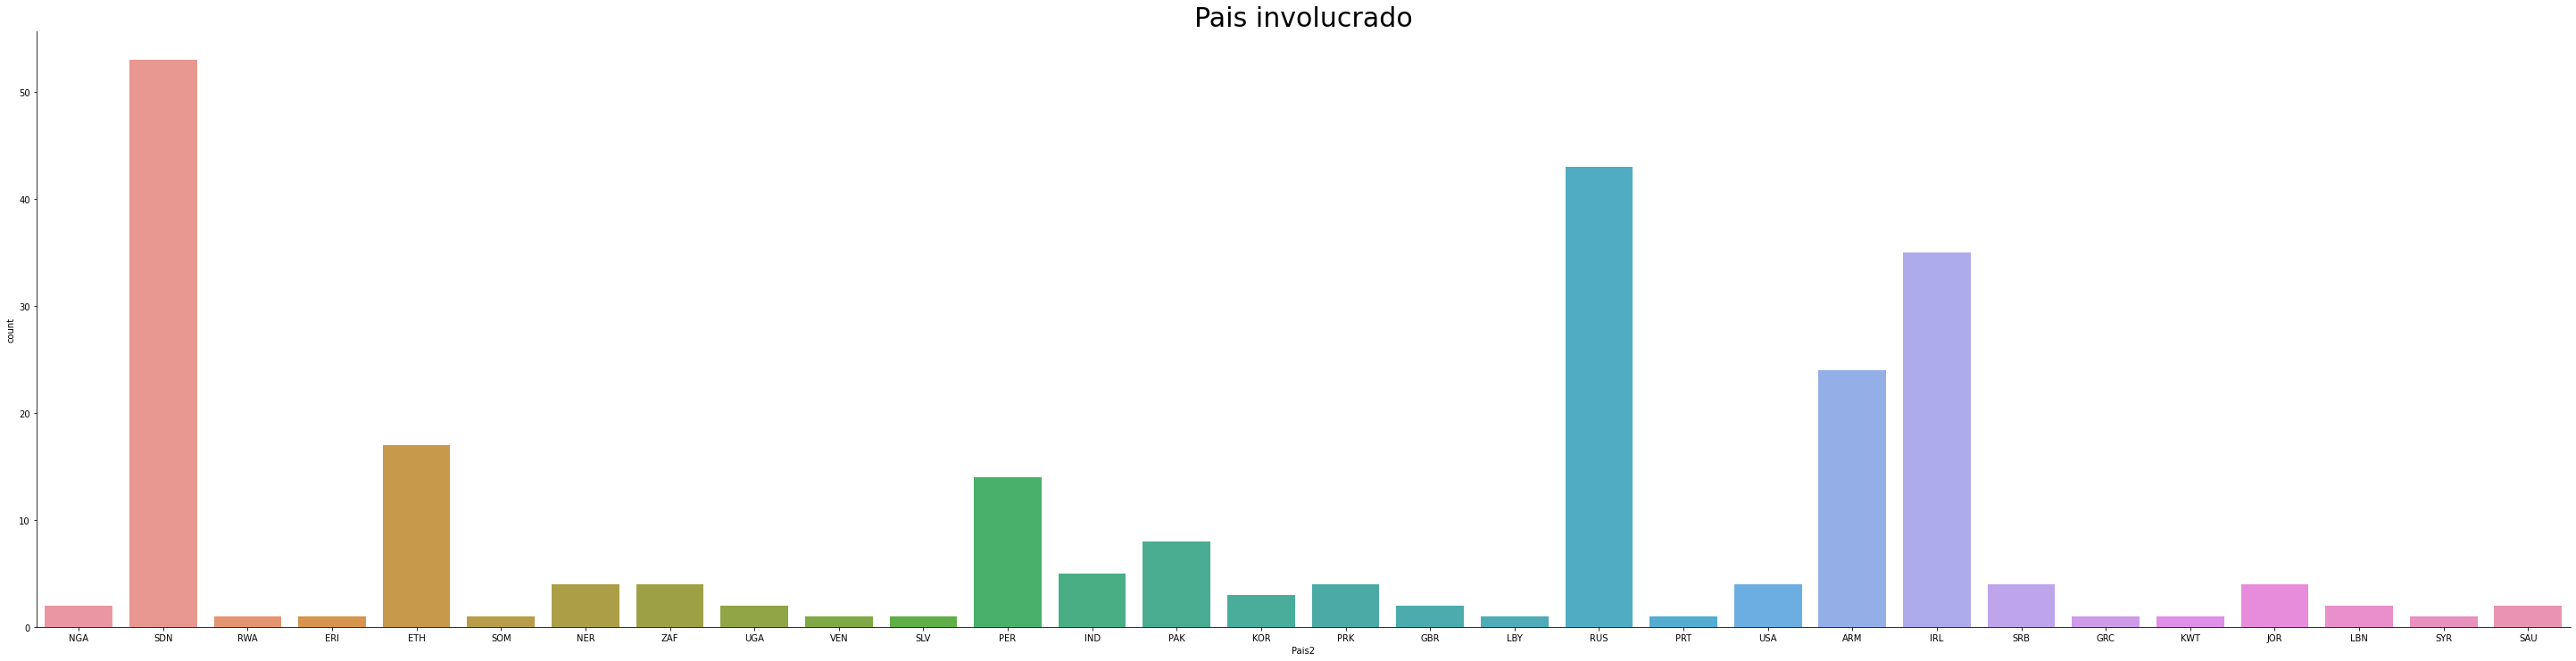

In [9]:
sns.catplot('Pais1', data=data, kind='count', height= 10, aspect=4)
plt.title('Pais principal', {'fontsize': 30})
sns.catplot('Pais2', data=data, kind='count', height= 10, aspect=4)
plt.title('Pais involucrado', {'fontsize': 30})

En estos dos diagramas de barras se muestran los paises conflictivos, es decir, aquellos países que realizan más tratados de paz.

En la gráfica superior se muestran todo tipo de conflictos, por lo que vemos **Colombia**, es el pais que más tratados de paz tienen con muchísima diferencia y por tanto, **el más conflictivo**.

En la gráfica de la derecha unicamente se muestran conflictos en los que se encuentran relacionados más de un pais, por lo que podemos deducir que **Sudan y Rusia es el país que más conflictos tienen con otros estados o países.**

#### GRUPOS AFECTADOS

Tenemos cuatro clases a las que se hace referencia:

SinMencion: en el tratado de paz no se hizo ninguna referencia a este grupo.
Retorico: unicamente hay una mención al grupo y es puramente retórica.
Anti-discriminacion: se buscan medidas anti-discriminatorias hacia el grupo mencionado.
Sustantivo: se hace una referencia exahustiva hacia el grupo, buscando medidas a favor de sus derechos de forma sustancial, incluyendo también medidas anti-discriminatorias.

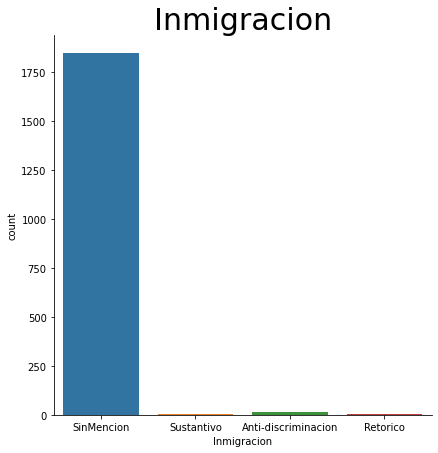

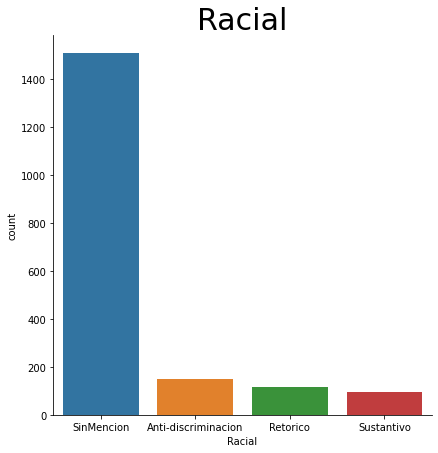

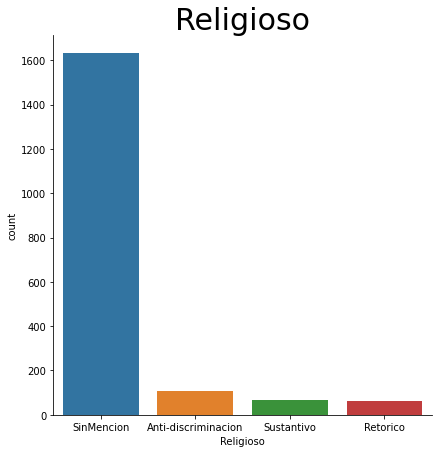

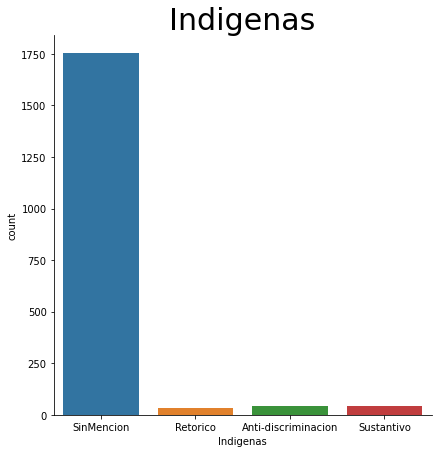

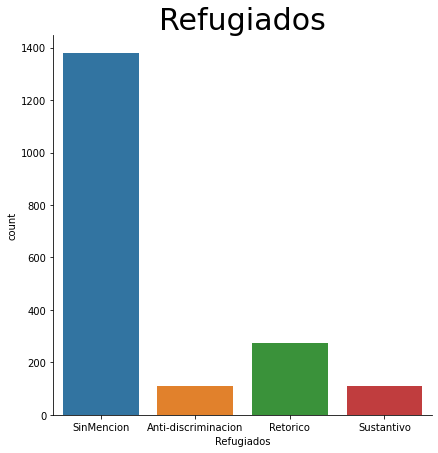

In [10]:
for i in columna:
    sns.catplot(i, data=data, kind='count', height= 6)
    plt.title(i, {'fontsize': 30})

Se puede observar como la inmigración es el grupo que menos se ve afectado mientras que el resto de grupos si que presentan mayor implicación en la conflictiva a nivel mundial.

## HERRAMIENTAS

El primer paso ha sido utilizar la herramienta **databasic.io** con la cual hemos podido obtener una rápida interpretación de todos los atributos que contenía el dataset y ver cuales de ellos podían resultar de interés.

Como se puede observar, para esta PEC hemos utilizado **Phyton sobre la plataforma Jupyter**, una herramienta muy potenta para el análisis y visualización de datos. En este caso nos hemos valido de un análisis de frecuencia mediante gráficos de barras para conocer los paises que más implicados están en diferentes conflictos. Para todo este proceso nos hemos ayudado de las librerías **pandas y matplotlib**, muy útiles cuando tratamos de trabajar con dataset y a la hora de visualizar.